In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from imblearn.over_sampling import RandomOverSampler

# Data exploration

In [4]:
df = pd.read_csv("data.csv")

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Classifying the diagnosis wether it is M = malignant or B = Beningn

In [6]:
# convert M to 1
df["diagnosis"] = (df["diagnosis"] == "M").astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int32  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
## Understand the shape of the data

In [9]:
cols = [cname for cname in df.columns]

In [10]:
len(cols)

33

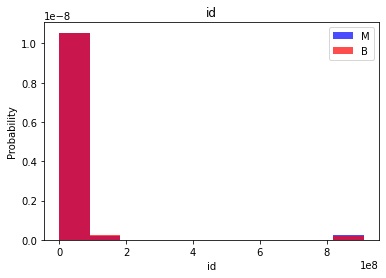

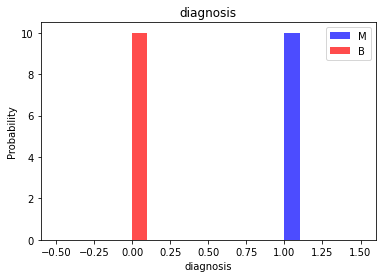

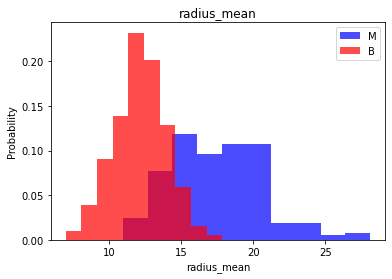

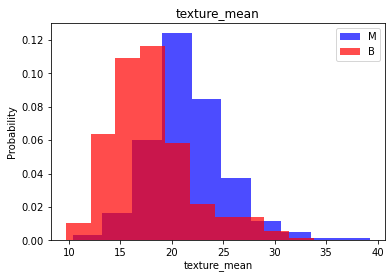

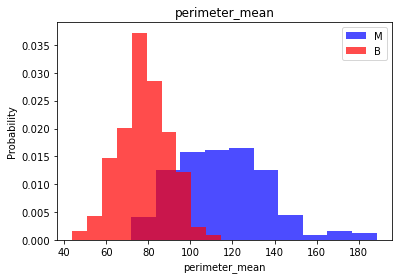

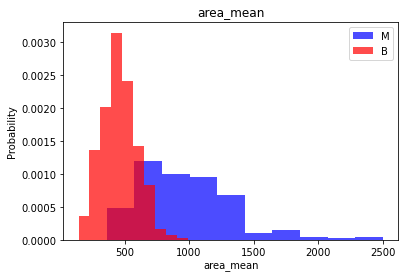

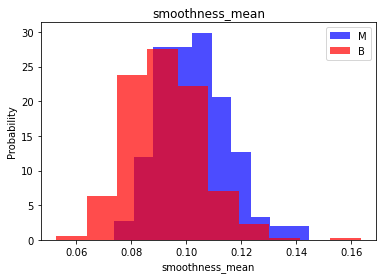

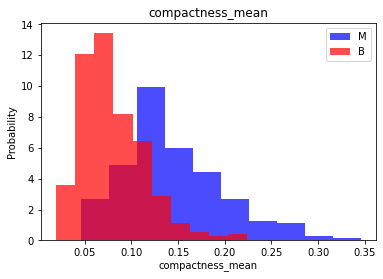

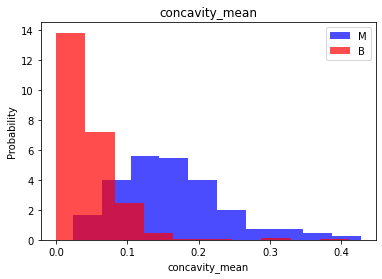

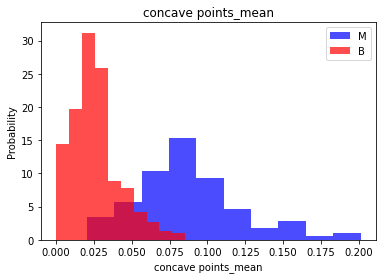

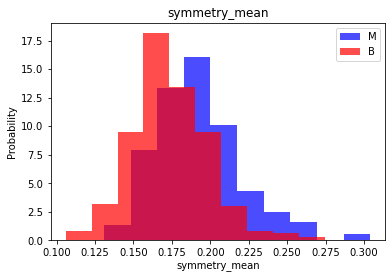

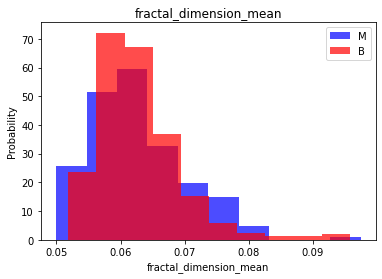

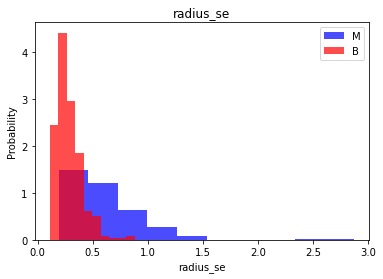

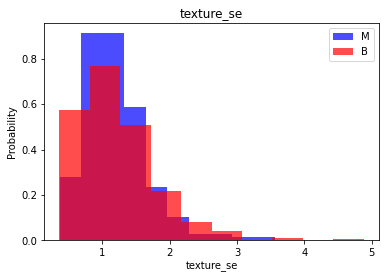

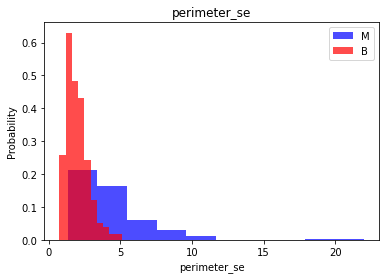

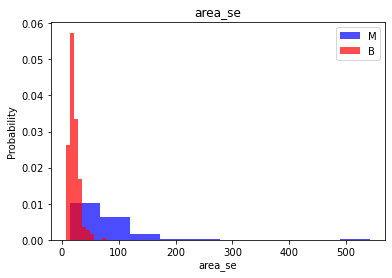

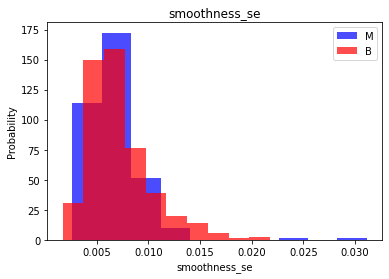

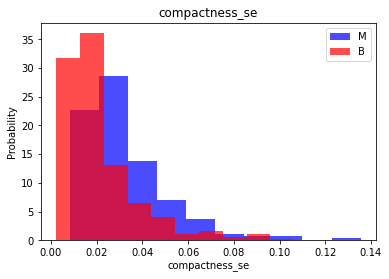

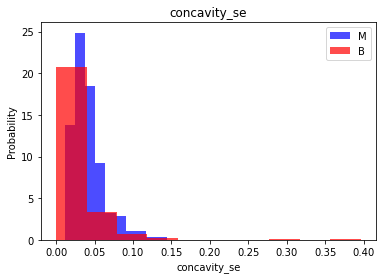

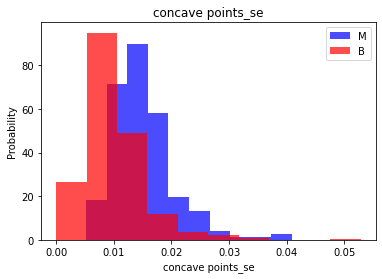

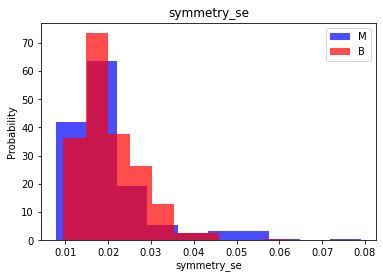

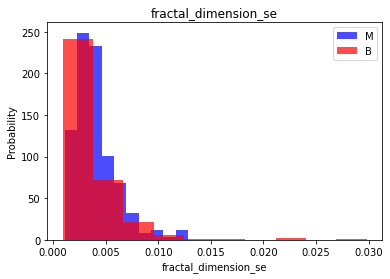

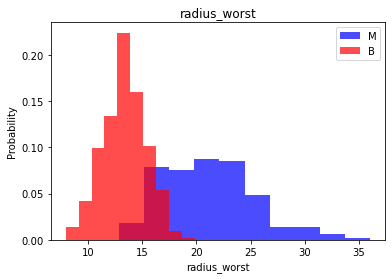

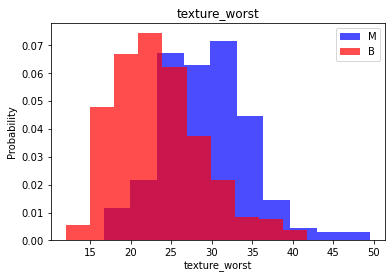

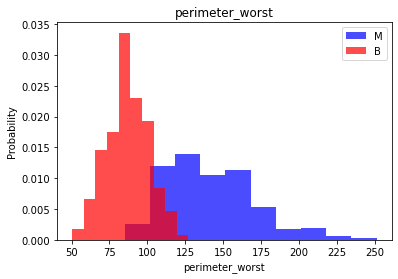

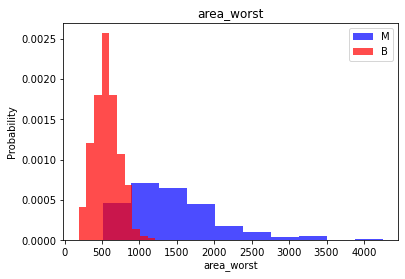

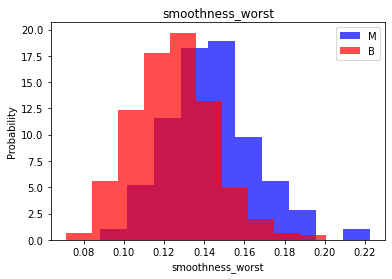

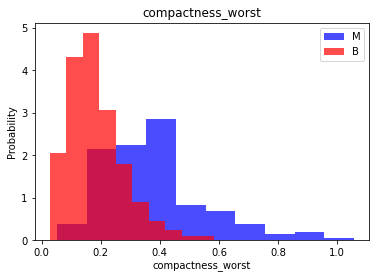

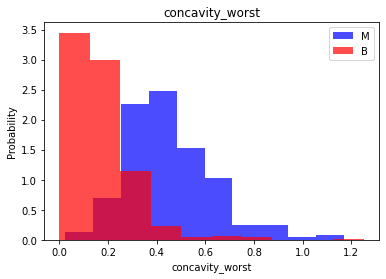

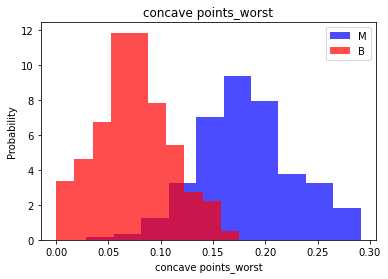

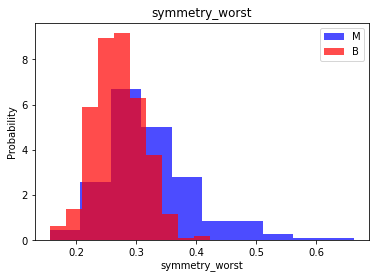

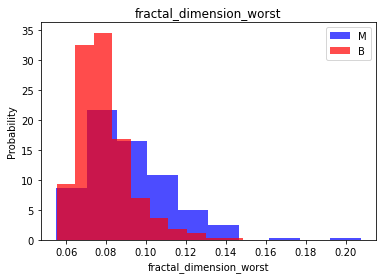

In [11]:
## plot the 10 different feautres to a histogram
for label in cols[: -1]:
    plt.hist(df[df["diagnosis"] == 1][label], color = 'blue', label = 'M', alpha = 0.7, density = True)
    plt.hist(df[df["diagnosis"]== 0][label], color = 'red', label = 'B', alpha = 0.7, density = True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [12]:
# Dropping irrelevant columns
df.drop("id", axis = 1, inplace = True)
df.drop("Unnamed: 32", axis = 1, inplace = True)

In [13]:
# Separating the target feature and dropping it
y = df["diagnosis"]
df.drop("diagnosis", axis = 1, inplace = True)

In [14]:
X = df[df.columns]
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=42)

# Base model

In [16]:
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

In [17]:
model_1 = XGBClassifier()

model_1.fit(X_train, y_train)
pred = model_1.predict(X_test)


print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# Feature Importance in the Base Model

<AxesSubplot:title={'center':'Feature Importance'}>

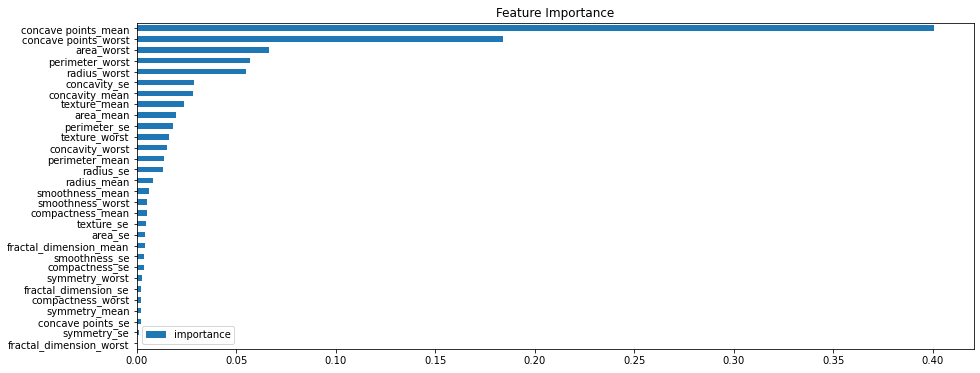

In [18]:
fi = pd.DataFrame(data = model_1.feature_importances_,
             index = model_1.feature_names_in_,
             columns = ["importance"])


fi.sort_values('importance').plot(kind='barh', title = 'Feature Importance', figsize = (15,6))

In [19]:
top_n = fi.sort_values(by='importance', ascending=False).head(8)
top_n

,importance
concave points_mean,0.400554
concave points_worst,0.184009
area_worst,0.066541
perimeter_worst,0.056906
radius_worst,0.054863
concavity_se,0.029083
concavity_mean,0.028313
texture_mean,0.023993


In [20]:
top_cols = ["concave points_worst" , "concave points_mean", "perimeter_worst", "radius_worst", "area_worst", "texture_worst", "concavity_worst","perimeter_se", "texture_mean", "radius_mean"]

X_top = X[top_cols]
X_top.head()

,concave points_worst,concave points_mean,perimeter_worst,radius_worst,area_worst,texture_worst,concavity_worst,perimeter_se,texture_mean,radius_mean
0,0.2654,0.14710,184.60,25.38,2019.0,17.33,0.7119,8.589,10.38,17.99
1,0.1860,0.07017,158.80,24.99,1956.0,23.41,0.2416,3.398,17.77,20.57
2,0.2430,0.12790,152.50,23.57,1709.0,25.53,0.4504,4.585,21.25,19.69
3,0.2575,0.10520,98.87,14.91,567.7,26.50,0.6869,3.445,20.38,11.42
4,0.1625,0.10430,152.20,22.54,1575.0,16.67,0.4000,5.438,14.34,20.29


# Preprocesing for Model Deployment

In [21]:
numeric_transformer = Pipeline([
    ('scaler', Normalizer())    # Standardize numeric features
])


pipeline = Pipeline(
    steps = [
        ("preprocessor", numeric_transformer)
    ]
)

In [22]:
X_pp = pipeline.fit_transform(X_top)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_pp, y, train_size=0.8, test_size=0.2,
                                                                random_state=42)

# Model Building

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## Hyperparamter tuning

In [25]:
# Create an XGBClassifier
model_2 = XGBClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.1, 0.01, 0.001, 0.05]
}

# Create a GridSearchCV object with the model and parameter grid
grid_search = GridSearchCV(model_2, param_grid=param_grid, cv=4)

# Fit the grid search object to your data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_


In [26]:
best_params

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 400}

In [27]:
best_score

0.96477643223102

## Final Model

In [28]:
best_model = XGBClassifier(learning_rate = 0.1, max_depth = 3, n_estimators = 300)

best_model.fit(X_train, y_train)
pred = best_model.predict(X_test)


print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [29]:
import joblib

# Serialize the model and preprocessing pipeline
joblib.dump(best_model, 'best_model.joblib')
joblib.dump(pipeline, 'pipeline.joblib')


['pipeline.joblib']

In [30]:
# Load the model and preprocessing pipeline
loaded_model = joblib.load('best_model.joblib')
loaded_pipeline = joblib.load('pipeline.joblib')

In [31]:
# Assuming you have a trained model 'best_xgb_model' and a preprocessor 'pipeline'

first_row = X_top.iloc[0]

# Create a DataFrame with the same columns as in your training data
first_row_df = pd.DataFrame(data=[first_row])

# Preprocess the first row using your preprocessor
first_row_data = pipeline.transform(first_row_df)

# Make predictions using your model
prediction = best_model.predict(first_row_data)
prediction

array([1])

In [33]:
X_top.iloc[10]

concave points_worst       0.09975
concave points_mean        0.03323
perimeter_worst          123.80000
radius_worst              19.19000
area_worst              1150.00000
texture_worst             33.88000
concavity_worst            0.14590
perimeter_se               2.46600
texture_mean              23.24000
radius_mean               16.02000
Name: 10, dtype: float64